In [92]:
import pandas as pd

seed = pd.read_csv("data/2024_tourney_seeds.csv")

def compute_ncaa_bracket(seed):
    seed = seed[seed['Tournament'] == 'M']
    seed['Conference'] = seed['Seed'].str.slice(0,1)
    seed['Position'] = seed['Seed'].str.slice(-2).astype(int)

    df = pd.DataFrame(columns=['Conference', 'Game', 'TeamA', 'TeamB'])
    new_order = []
    for conference in list(seed['Conference'].unique()):
        conf = seed[seed['Conference'] == conference]
        while not conf.empty:
            top_team = conf[conf['Position'] == conf['Position'].min()]
            low_team = conf[conf['Position'] == conf['Position'].max()]
            
            game = top_team['Seed'].values[0][1:] + low_team['Seed'].values[0][1:]
            
            df.loc[len(df)] = [conference, game, top_team['TeamID'].values[0], low_team['TeamID'].values[0]]
            
            conf = conf.drop(top_team.index, inplace=False, axis='index')
            conf = conf.drop(low_team.index, inplace=False, axis='index')

        df_conf=df[df['Conference'] == conference]
        games = list(df_conf.index)
        splits_top = [min(games[0: len(games) // 2]), max(games[0: len(games) // 2]), min(games[len(games) // 2 : ]), max(games[len(games) // 2: ])]
        for i in splits_top: games.remove(i)
        split_bottom = games.copy()
        # create order for split_top
        splits_top.reverse()
        splits_top.insert(0, splits_top[-1])
        splits_top.pop()
        # Create order for split_bottom
        split_bottom.reverse()
        split_bottom.insert(-1, split_bottom[0])
        del split_bottom[0]
        splits_top.extend(split_bottom)
        new_order.extend(splits_top)
    
    print(new_order)

    df = df.reindex(new_order)
    df.reset_index(inplace=True)
    df.drop(columns=['index'], inplace=True)

    next_df = df.copy()
    final_df = df.copy()

    while not next_df.empty and len(next_df) > 1:
        df = pd.DataFrame(columns=['Conference', 'Game', 'TeamA', 'TeamB'])
        for conference in list(next_df['Conference'].unique()):
            conf = next_df[next_df['Conference'] == conference]
            
            if len(conf) > 1:
                for i in range(0, len(conf), 2):
                    top_team = conf.iloc[i]
                    low_team = conf.iloc[i+1]
                    game = top_team['Game'] +"_"+low_team['Game']
                    final_df.loc[len(final_df)] = [conference, game, top_team['Game'], low_team['Game']]
                    df.loc[len(df)] = [conference, game, top_team['Game'], low_team['Game']]
                
                
                
                
            # while not conf.empty and len(conf) > 1:
            #     top_team = conf[conf['Game'] == conf['Game'].min()]
            #     low_team = conf[conf['Game'] == conf['Game'].max()]
            #     if top_team.index < low_team.index: 
            #         game = top_team['Game'].values[0] +"_"+low_team['Game'].values[0]
            #         final_df.loc[len(final_df)] = [conference, game, top_team['Game'].values[0], low_team['Game'].values[0]]
            #     else:
            #         game = low_team['Game'].values[0] + "_"+ top_team['Game'].values[0]
            #         final_df.loc[len(final_df)] = [conference, game, low_team['Game'].values[0], top_team['Game'].values[0]]
                    
                
            #     df.loc[len(df)] = [conference, game, top_team['Game'].values[0], low_team['Game'].values[0]]
            #     conf = conf.drop(top_team.index, inplace=False, axis='index')
            #     conf = conf.drop(low_team.index, inplace=False, axis='index')
                
        next_df  = df.copy()


    return final_df

bracket = compute_ncaa_bracket(seed)

[0, 7, 4, 3, 5, 2, 6, 1, 8, 15, 12, 11, 13, 10, 14, 9, 16, 23, 20, 19, 21, 18, 22, 17, 24, 31, 28, 27, 29, 26, 30, 25]


/tmp/ipykernel_255299/2862113002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seed['Conference'] = seed['Seed'].str.slice(0,1)
/tmp/ipykernel_255299/2862113002.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seed['Position'] = seed['Seed'].str.slice(-2).astype(int)


In [93]:
bracket[bracket['Conference'] == "W"]
# bracket.iloc[0]['Game']

,Conference,Game,TeamA,TeamB
0,W,0116,1345,1192
1,W,0809,1272,1194
2,W,0512,1181,1331
3,W,0413,1397,1418
4,W,0611,1246,1344
5,W,0314,1243,1286
6,W,0710,1277,1425
7,W,0215,1266,1436
32,W,0116_0809,0116,0809
33,W,0512_0413,0512,0413


In [94]:
def pregame_data(teamA, teamB, data, columns):

    home_columns = ['Home', 'HPF', 'HA2TR', 'HOffR', 'HAllR', 'HFGP', 'HPFR', 'HStreak']
    away_columns = ['Away', 'APF', 'AA2TR', 'AOffR', 'AAllR', 'AFGP', 'APFR', 'AStreak']
    # Cogemos el ultimmo partido de ambos equipos
    teamA_data = data[(data['Season'] == 2024) & ((data['Home'] == teamA) | (data['Away'] == teamA))].tail(1)
    teamB_data = data[(data['Season'] == 2024) & ((data['Home'] == teamB) | (data['Away'] == teamB))].tail(1)
    
    if teamA_data['Home'].values[0] == teamA:
        teamA_data = teamA_data[home_columns]
    else:
        teamA_data = teamA_data[away_columns]
        renamed_a2h_columns = {x:v for x,v in zip(away_columns, home_columns)}
        teamA_data = teamA_data.rename(columns=renamed_a2h_columns)

    if teamB_data['Home'].values[0] == teamB:
        teamB_data = teamB_data[home_columns]
        renamed_h2a_columns = {x:v for x,v in zip(home_columns, away_columns)}
        teamB_data = teamB_data.rename(columns=renamed_h2a_columns)
    else:
        teamB_data = teamB_data[away_columns]
    teamA_data.reset_index(inplace=True, drop=True)
    teamB_data.reset_index(inplace=True, drop=True)
    game = pd.concat([teamA_data, teamB_data], axis='columns')
    game['Season'] = 2024
    game['DayNum'] = 137
    game['Result'] = None
    
    return game[columns]
    
    
        

In [95]:
MedianSeasonAgg = pd.read_csv("data/MMedianSeasonAggStreak_2.csv")
MedianSeasonAgg.dropna(inplace=True)
MedianSeasonAgg

game = pregame_data(teamA=1345, teamB=1192, data=MedianSeasonAgg, columns=MedianSeasonAgg.columns)
game

,Season,DayNum,Home,Away,Result,HPF,HA2TR,HOffR,HAllR,HFGP,HPFR,APF,AA2TR,AOffR,AAllR,AFGP,APFR,HStreak,AStreak
0,2024,137,1345.0,1192.0,None,13.0,1.75,0.37037,0.584615,0.459459,0.405405,18.5,1.190909,0.256777,0.481517,0.394772,0.5,1.0,-1.0


In [96]:
game['DayNum'].values[0]

137

In [97]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

MedianSeasonAgg = pd.read_csv("data/MMedianSeasonAggStreak_2.csv")
MedianSeasonAgg.dropna(inplace=True)

# Separate X, Y for training
X = MedianSeasonAgg.drop(columns=['Result'])
Y = MedianSeasonAgg['Result']

# train test spllt
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# random forest

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(x_train, y_train)


def generate_prediction(game_data, model):
    game_data.drop(columns=['Result'], inplace=True)
    result = model.predict(game_data)
    if result == 1:
        return game_data['Home'].values[0]
    else:
        return game_data['Away'].values[0]
    

def predict_ncaa_bracket(bracket, season_data, model):
    for i in range(len(bracket)):
        game = bracket.loc[i, :]
        teamA, teamB, game_name, conference = game['TeamA'], game['TeamB'], game['Game'], game['Conference']
        print(f"Game: - {game_name}     Teams: {teamA} vs {teamB}")
        game_data = pregame_data(teamA=teamA, teamB=teamB, data=season_data, columns=season_data.columns)
        winner = generate_prediction(game_data=game_data, model=model)
        print(f"Game: - {game_name}     Teams: {teamA} vs {teamB}  --> Winner  {winner}")

        idx = bracket[(bracket['Conference'] == conference) & (bracket['TeamA'] == game_name)].index.values
        if len(idx)>0:
            idx = idx[0]
            bracket.at[idx, 'TeamA'] = winner
        
        idx = bracket[(bracket['Conference'] == conference) & (bracket['TeamB'] == game_name)].index.values
        if len(idx)>0:
            idx = idx[0]
            bracket.at[idx, 'TeamB'] = winner
        bracket.loc[(bracket['Conference'] == conference) & (bracket['Game'] == game_name), "Winner"] = winner
        

    return bracket
        
        


In [98]:
def add_teamsName_2_bracket_output(bracke_df, teams):
    merge = bracke_df.merge(teams, left_on='TeamA', right_on='TeamID')
    merge["TeamAName"] = merge["TeamName"]
    merge.drop(columns=["TeamID", "TeamName", "FirstD1Season", "LastD1Season"], inplace=True)
    merge = merge.merge(teams, left_on='TeamB', right_on='TeamID')
    merge["TeamBName"] = merge["TeamName"]
    merge.drop(columns=["TeamID", "TeamName", "FirstD1Season", "LastD1Season"], inplace=True)
    merge['level'] = merge['Game'].str.count('_')
    merge['level'] = merge['level'].apply(lambda x: list(merge['level'].unique()).index(x))

    
    return merge

In [99]:
def reorder_bracket_df(df):
    new_order = []
    level = list(df['level'].unique())
    for conf in list(df['Conference'].unique()):
        wconf = df[df['Conference'] == conf]
        for l in level:
            level_wconf = wconf[wconf['level'] == l]
            if l == 0:
                games = list(level_wconf.index)
                splits_top = [min(games[0: len(games) // 2]), max(games[0: len(games) // 2]), min(games[len(games) // 2 : ]), max(games[len(games) // 2: ])]
                for i in splits_top: games.remove(i)
                split_bottom = games.copy()
                # create order for split_top
                splits_top.reverse()
                splits_top.insert(0, splits_top[-1])
                splits_top.pop()
                # Create order for split_bottom
                split_bottom.reverse()
                split_bottom.insert(-1, split_bottom[0])
                del split_bottom[0]
                splits_top.extend(split_bottom)
                new_order.extend(splits_top)
                
            if l == 1:
                games = list(level_wconf.index)
                splits = [min(games), max(games), max(games[:-1]), min(games[1:])]
                new_order.extend(splits)
                print(splits)
            if l == 2:
                games = list(level_wconf.index)
                splits = [min(games), max(games)]
                new_order.extend(splits)
            if l == 3:
                games = list(level_wconf.index)
                new_order.extend(games)
    
    df_reordered = df.reindex(new_order)
    return df_reordered


        
    

In [103]:
def pipeline():
    seed = pd.read_csv("data/2024_tourney_seeds.csv")
    bracket = compute_ncaa_bracket(seed)
    MedianSeasonAgg = pd.read_csv("data/MMedianSeasonAggStreak_2.csv")
    MedianSeasonAgg.dropna(inplace=True)

    # Separate X, Y for training
    X = MedianSeasonAgg.drop(columns=['Result'])
    Y = MedianSeasonAgg['Result']

    # train test spllt
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

    # random forest

    # model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    # model.fit(x_train, y_train)
    
    model = LogisticRegression(C=0.0001)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_true=y_test, y_pred=y_pred))
    
    solved_bracket = predict_ncaa_bracket(bracket=bracket, season_data=MedianSeasonAgg, model=model)
    
    final_four = solved_bracket.tail(4)
    teams = pd.read_csv('data/MTeams.csv')

    merge = add_teamsName_2_bracket_output(solved_bracket, teams)
    
    #merge = reorder_bracket_df(merge)
    
    return  final_four, MedianSeasonAgg, model
    
    
    
    


In [12]:
import itertools
dic = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2, 0.3]}
parametros_claves = list(dic.keys())  # ['n_estimators', 'learning_rate']
valores_parametros = list(dic.values()) 
combinations = itertools.product(*valores_parametros)
res = list(combinations)

result = []
for r in res:
    dic = {}
    for k, v in zip(parametros_claves, r):
        dic[k] = v
    result.append(dic)
result

[{'n_estimators': 50, 'learning_rate': 0.01},
 {'n_estimators': 50, 'learning_rate': 0.1},
 {'n_estimators': 50, 'learning_rate': 0.2},
 {'n_estimators': 50, 'learning_rate': 0.3},
 {'n_estimators': 100, 'learning_rate': 0.01},
 {'n_estimators': 100, 'learning_rate': 0.1},
 {'n_estimators': 100, 'learning_rate': 0.2},
 {'n_estimators': 100, 'learning_rate': 0.3},
 {'n_estimators': 200, 'learning_rate': 0.01},
 {'n_estimators': 200, 'learning_rate': 0.1},
 {'n_estimators': 200, 'learning_rate': 0.2},
 {'n_estimators': 200, 'learning_rate': 0.3}]

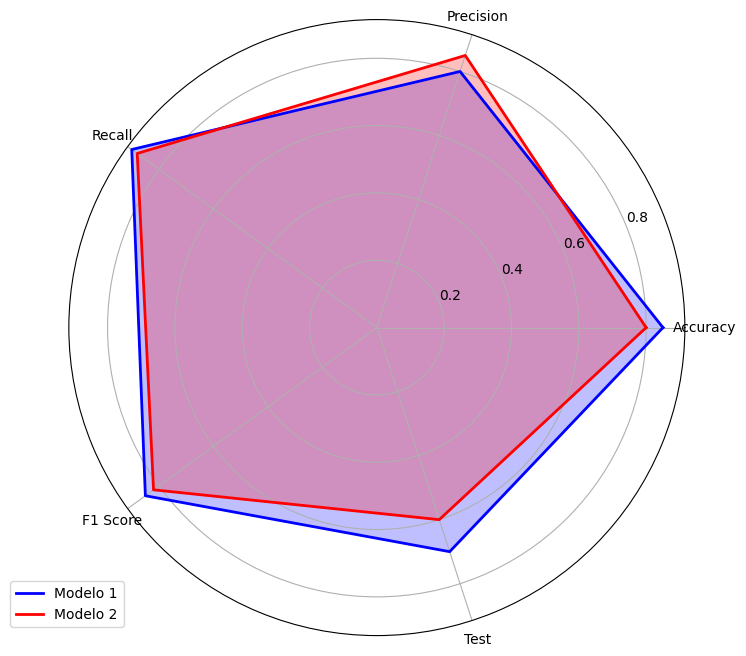

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
# Definir las métricas
categorias = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Test']

# Valores para el Modelo 1
modelo1 = [0.85, 0.80, 0.90, 0.85, 0.7]

# Valores para el Modelo 2
modelo2 = [0.80, 0.85, 0.88, 0.82, 0.6]
# Número de variables
N = len(categorias)

# Ángulos para cada categoría
angulos = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# Completa el círculo
modelo1 += modelo1[:1]
modelo2 += modelo2[:1]
angulos += angulos[:1]
# Inicializa el gráfico en forma polar
# Inicializa el gráfico en forma polar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibuja una línea por cada modelo y rellena el área
ax.fill(angulos, modelo1, color='blue', alpha=0.25)
ax.fill(angulos, modelo2, color='red', alpha=0.25)

# Dibuja los bordes de las áreas
ax.plot(angulos, modelo1, color='blue', linewidth=2, linestyle='solid', label='Modelo 1')
ax.plot(angulos, modelo2, color='red', linewidth=2, linestyle='solid', label='Modelo 2')

# Añade etiquetas para cada ángulo
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias)

# Ajusta la escala radial
ax.set_rscale('linear')

# Añade una leyenda
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))



In [113]:
final_four, MedianSeasonAgg, model = pipeline()


/tmp/ipykernel_255299/2862113002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seed['Conference'] = seed['Seed'].str.slice(0,1)
/tmp/ipykernel_255299/2862113002.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seed['Position'] = seed['Seed'].str.slice(-2).astype(int)


[0, 7, 4, 3, 5, 2, 6, 1, 8, 15, 12, 11, 13, 10, 14, 9, 16, 23, 20, 19, 21, 18, 22, 17, 24, 31, 28, 27, 29, 26, 30, 25]


/home/raul/uni/tfg/march-madness/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6347749164537055
Game: - 0116     Teams: 1345 vs 1192
Game: - 0116     Teams: 1345 vs 1192  --> Winner  1345.0
Game: - 0809     Teams: 1272 vs 1194
Game: - 0809     Teams: 1272 vs 1194  --> Winner  1272.0
Game: - 0512     Teams: 1181 vs 1331
Game: - 0512     Teams: 1181 vs 1331  --> Winner  1181.0
Game: - 0413     Teams: 1397 vs 1418
Game: - 0413     Teams: 1397 vs 1418  --> Winner  1397.0
Game: - 0611     Teams: 1246 vs 1344
Game: - 0611     Teams: 1246 vs 1344  --> Winner  1344.0
Game: - 0314     Teams: 1243 vs 1286
Game: - 0314     Teams: 1243 vs 1286  --> Winner  1243.0
Game: - 0710     Teams: 1277 vs 1425
Game: - 0710     Teams: 1277 vs 1425  --> Winner  1277.0
Game: - 0215     Teams: 1266 vs 1436
Game: - 0215     Teams: 1266 vs 1436  --> Winner  1436.0
Game: - 0116     Teams: 1104 vs 1369
Game: - 0116     Teams: 1104 vs 1369  --> Winner  1104.0
Game: - 0809     Teams: 1268 vs 1452
Game: - 0809     Teams: 1268 vs 1452  --> Winner  1268.0
Game: - 0512     Teams: 1361 vs 1158
Game

In [118]:
REGION_MATCH_UP = {
    "W": "X",
    "Y": "Z"
}

def predict_final_four(final_four_data, season_data, model):
    final_four_data = final_four_data.reset_index()
    final_four_data.drop(columns=['index'], inplace=True)
    final_four_bracket = pd.DataFrame(columns=list(final_four_data.columns))
    new_conf = []
    for k,v in REGION_MATCH_UP.items():
        new_conf.append(f"{k}_{v}")
        winner_k, game_id_k = final_four_data[final_four_data['Conference'] == k][["Winner", "Game"]].values[0]
        winner_v, game_id_v = final_four_data[final_four_data['Conference'] == v][["Winner", "Game"]].values[0]
        print(final_four_bracket.columns)
        final_four_bracket.loc[len(final_four_bracket)] = [f"{k}_{v}", f"{game_id_k}_{game_id_v}", winner_k, winner_v, None]
    wx_game = final_four_bracket[final_four_bracket["Conference"] == new_conf[0]]
    yz_game = final_four_bracket[final_four_bracket["Conference"] == new_conf[1]]

    final_four_bracket.loc[len(final_four_bracket)] = ["_".join(new_conf), f"{wx_game['Game'].values[0]}_{yz_game['Game'].values[0]}", wx_game['Game'].values[0], yz_game['Game'].values[0], None]

    for i in range(len(REGION_MATCH_UP)):
        game = final_four_bracket.loc[i, :]
        teamA, teamB, game_name, conference = game['TeamA'], game['TeamB'], game['Game'], game['Conference']
        print(f"Game: - {game_name}     Teams: {teamA} vs {teamB}")
        game_data = pregame_data(teamA=teamA, teamB=teamB, data=season_data, columns=season_data.columns)
        winner = generate_prediction(game_data=game_data, model=model)
        column = "TeamA" if i == 0 else "TeamB"
        final_four_bracket.loc[final_four_bracket["Conference"] == "_".join(new_conf), column] = winner

        final_four_bracket.loc[final_four_bracket["Conference"] == conference, "Winner"] = winner

    game = final_four_bracket.loc[len(final_four_bracket)-1, :]
    teamA, teamB, game_name, conference = game['TeamA'], game['TeamB'], game['Game'], game['Conference']
    print(f"Game: - {game_name}     Teams: {teamA} vs {teamB}")
    game_data = pregame_data(teamA=teamA, teamB=teamB, data=season_data, columns=season_data.columns)
    winner = generate_prediction(game_data=game_data, model=model)
    final_four_bracket.loc[final_four_bracket["Conference"] == "_".join(new_conf), "Winner"] = winner
    
    
    
    return final_four_bracket

ff=predict_final_four(final_four_data=final_four, season_data=MedianSeasonAgg, model=model)
ff

Index(['Conference', 'Game', 'TeamA', 'TeamB', 'Winner'], dtype='object')
Index(['Conference', 'Game', 'TeamA', 'TeamB', 'Winner'], dtype='object')
Game: - 0116_0809_0512_0413_0611_0314_0710_0215_0116_0809_0512_0413_0611_0314_0710_0215     Teams: 1436.0 vs 1343.0
Game: - 0116_0809_0512_0413_0611_0314_0710_0215_0116_0809_0512_0413_0611_0314_0710_0215     Teams: 1222.0 vs 1388.0
Game: - 0116_0809_0512_0413_0611_0314_0710_0215_0116_0809_0512_0413_0611_0314_0710_0215_0116_0809_0512_0413_0611_0314_0710_0215_0116_0809_0512_0413_0611_0314_0710_0215     Teams: 1343.0 vs 1388.0


,Conference,Game,TeamA,TeamB,Winner
0,W_X,0116_0809_0512_0413_0611_0314_0710_0215_0116_0...,1436.0,1343.0,1343.0
1,Y_Z,0116_0809_0512_0413_0611_0314_0710_0215_0116_0...,1222.0,1388.0,1388.0
2,W_X_Y_Z,0116_0809_0512_0413_0611_0314_0710_0215_0116_0...,1343.0,1388.0,1388.0


In [116]:
final_four

,Conference,Game,TeamA,TeamB,Winner
56,W,0116_0809_0512_0413_0611_0314_0710_0215,1397.0,1436.0,1436.0
57,X,0116_0809_0512_0413_0611_0314_0710_0215,1158.0,1343.0,1343.0
58,Y,0116_0809_0512_0413_0611_0314_0710_0215,1222.0,1280.0,1222.0
59,Z,0116_0809_0512_0413_0611_0314_0710_0215,1388.0,1211.0,1388.0


In [43]:
g, w = list(test[(test['Conference'] == 'W') & (test['Game'] == "0116")][["Winner", "Game"]].values[0])
g

1345.0

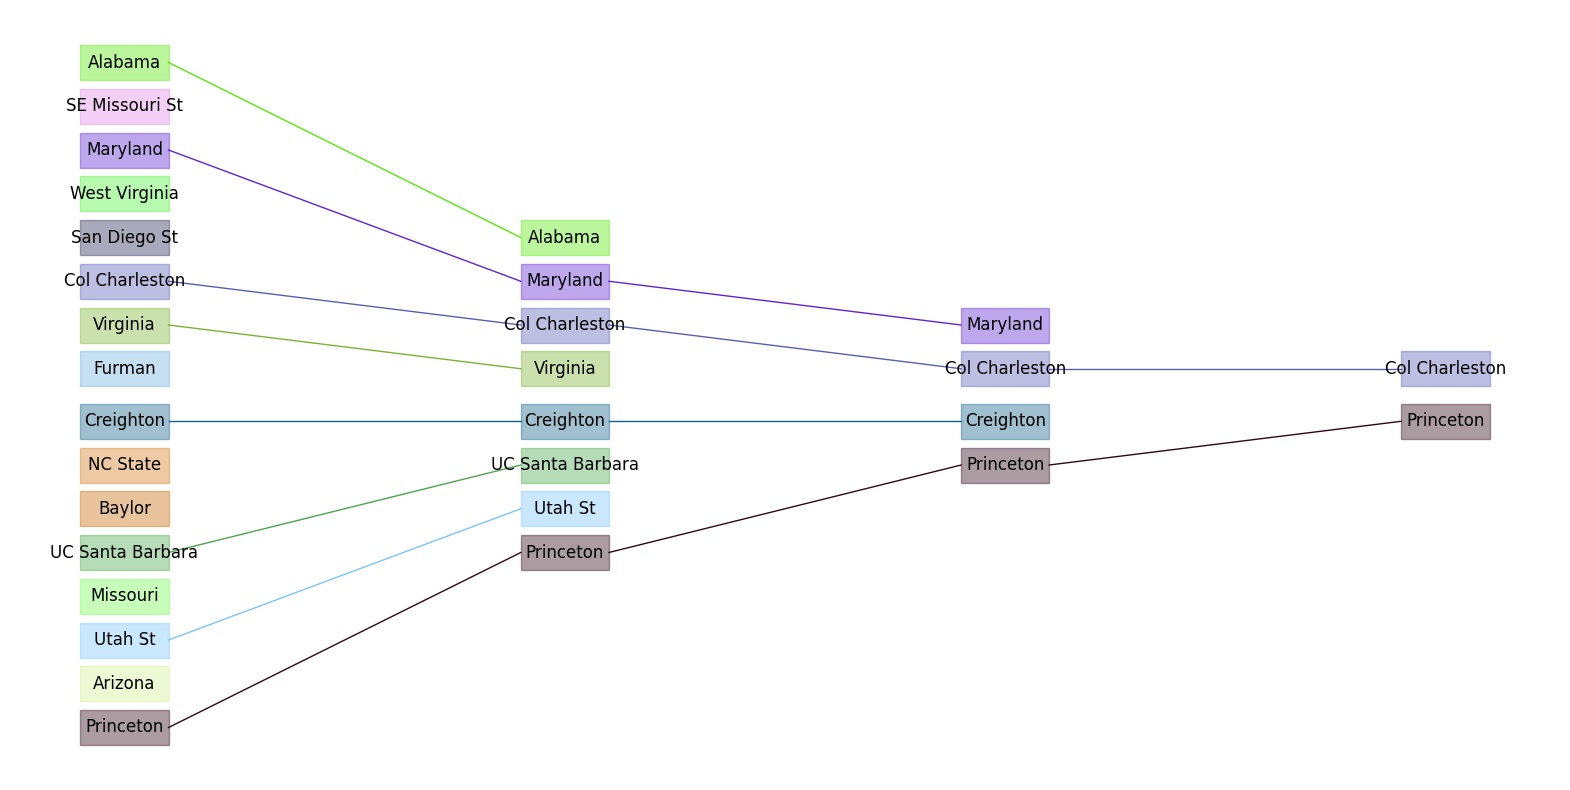

In [21]:
from bracket import Bracket
import matplotlib.pyplot as plt

new = test[test['Conference'] == 'X']

fig, ax = plt.subplots(figsize=(20, 10))
brk = Bracket(dataFrame=new)
brk.generate_graph(column_identifiers=['TeamAName', 'TeamBName'])
brk.plot(ax)
plt.savefig("bracket_plot/plot.png")

In [ ]:
import pandas as pd

df = pd.read_csv("data/MMedianSeasonAggStreak_2.csv")

df[df["Result"] == 0].sum()


# Test


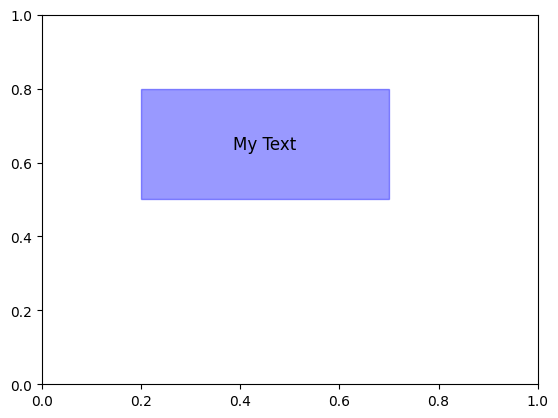

In [14]:
import matplotlib
import matplotlib.pyplot as plt

# Define rectangle properties
rectangle_width = 0.5
rectangle_height = 0.3
rectangle_x = 0.2
rectangle_y = 0.5

# Define text properties
text_content = "My Text"
text_color = "black"
text_fontsize = 12

# Create the figure and axis
fig, ax = plt.subplots()
# Create the rectangle patch
rectangle_patch = matplotlib.patches.Rectangle(xy=(rectangle_x, rectangle_y),
                                             width=rectangle_width, height=rectangle_height,
                                             color='blue', alpha=0.4)

# Add the rectangle to the axis
ax.add_patch(rectangle_patch)

# Calculate text position for centering
text_x_position = rectangle_x + rectangle_width / 2
text_y_position = rectangle_y + rectangle_height / 2

# Create the text annotation
text_annotation = plt.text(x=text_x_position, y=text_y_position, s=text_content,
                                    color=text_color, ha='center', va='center', fontsize=text_fontsize)


plt.show()


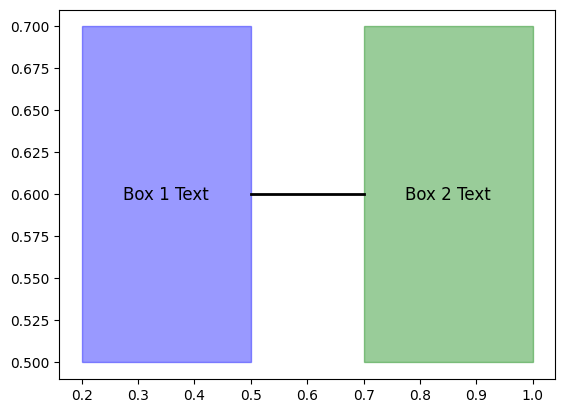

In [15]:
import matplotlib
import matplotlib.pyplot as plt

# Define rectangle properties
box1_width = 0.3  # Width of the first box
box1_height = 0.2  # Height of the first box
box1_x = 0.2  # X-position of the first box
box1_y = 0.5  # Y-position of the first box

box2_width = 0.3  # Width of the second box
box2_height = 0.2  # Height of the second box
box2_x = 0.7  # X-position of the second box
box2_y = 0.5  # Y-position of the second box

# Define text properties
text1_content = "Box 1 Text"
text2_content = "Box 2 Text"
text_color = "black"
text_fontsize = 12

# Create the figure and axis
fig, ax = plt.subplots()

# Create rectangle patches
box1_patch = matplotlib.patches.Rectangle(xy=(box1_x, box1_y),
                                         width=box1_width, height=box1_height,
                                         color='blue', alpha=0.4)
box2_patch = matplotlib.patches.Rectangle(xy=(box2_x, box2_y),
                                         width=box2_width, height=box2_height,
                                         color='green', alpha=0.4)

# Add rectangles to the axis
ax.add_patch(box1_patch)
ax.add_patch(box2_patch)

# Calculate text positions for centering
text1_x = box1_x + box1_width / 2
text1_y = box1_y + box1_height / 2
text2_x = box2_x + box2_width / 2
text2_y = box2_y + box2_height / 2

# Create text annotations
text1_annotation = plt.text(x=text1_x, y=text1_y, s=text1_content,
                             color=text_color, ha='center', va='center', fontsize=text_fontsize)
text2_annotation = plt.text(x=text2_x, y=text2_y, s=text2_content,
                             color=text_color, ha='center', va='center', fontsize=text_fontsize)


# Draw line between boxes (adjust coordinates as needed)
line_x1 = box1_x + box1_width
line_y1 = box1_y + box1_height / 2
line_x2 = box2_x
line_y2 = box2_y + box2_height / 2
plt.plot([line_x1, line_x2], [line_y1, line_y2], color='black', linewidth=2)

# Optional: Set axis limits and labels
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')

# Display the plot
plt.show()


In [16]:
games = [1, 2, 3, 4, 5, 6, 7, 8]

sides = [[], []]


top_side = games[0: len(games)//2]
top_side    
botmo_side=games[len(games)//2:]
botmo_side

[5, 6, 7, 8]

In [ ]:
def reorder_bracket_df(df):
    new_order = []
    level = list(df['level'].unique())
    for conf in list(df['Conference'].unique())
        wconf = df[df['Conference'] == conf]
        for l in level:
            level_wconf = wconf[wconf['level'] == l]
            if l == 0:
                games = list(level_wconf.index)
                splits_top = [min(games[0: len(games) // 2]), max(games[0: len(games) // 2]), min(games[len(games) // 2 : ]), max(games[len(games) // 2: ])]
                for i in splits_top: games.remove(i)
                split_bottom = games.copy()
                # create order for split_top
                splits_top.reverse()
                splits_top.insert(0, splits_top[-1])
                splits_top.pop()
                # Create order for split_bottom
                split_bottom.reverse()
                split_bottom.insert(-1, split_bottom[0])
                del split_bottom[0]
                splits_top.extend(split_bottom)
                new_order.extend(splits_top)
                
            if l == 1:
                games = list(level_wconf.index)
                splits = [min(games), max(games), max(games[1:]), min(games[:-1])]
                new_order.extend(splits)
                print(splits)
            if l == 2:
                games = list(level_wconf.index)
                splits = [min(games), max(games)]
                new_order.extend(splits)
            if l == 3:
                games = list(level_wconf.index)
                new_order.extend(games)

        
    

In [61]:
wconf = test[test['Conference'] == 'W']

level = list(wconf['level'].unique())
for l in level:
    level_wconf = wconf[wconf['level'] == l]
    if l == 0:
        games = list(level_wconf.index)
        splits_top = [min(games[0: len(games) // 2]), max(games[0: len(games) // 2]), min(games[len(games) // 2 : ]), max(games[len(games) // 2: ])]
        for i in splits_top: games.remove(i)
        split_bottom = games.copy()
        
        # create order for split_top
        splits_top.reverse()
        splits_top.insert(0, splits_top[-1])
        splits_top.pop()
        
        # Create order for split_bottom
        split_bottom.reverse()
        split_bottom.insert(-1, split_bottom[0])
        del split_bottom[0]
        splits_top.extend(split_bottom)

        print(splits_top)
    if l == 1:
        games = list(level_wconf.index)
        print(games)
        splits = [min(games), max(games), max(games[:-1]), min(games[1:])]
        print(splits)
    if l == 2:
        games = list(level_wconf.index)
        splits = [min(games), max(games)]
        print(splits)
    if l == 3:
        games = list(level_wconf.index)
        new_order.extend(games)

        

[0, 7, 4, 3, 5, 2, 6, 1] [5, 2, 6, 1]
[32, 33, 34, 35]
[32, 35, 34, 33]
[48, 49]


In [24]:
import pandas as pd

# Sample DataFrame
data = {'col1': [1, 2, 3, 4], 'col2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame(data)

# Desired order (list of original indices)
new_order = [2, 0, 3, 1]

# Reorder the DataFrame
df_reordered = df.reindex(new_order)

print(df_reordered)


   col1 col2
2     3    c
0     1    a
3     4    d
1     2    b
